## 🌳 🎛️ In Depth: Multivariate Normal Distribution 

The multivariate normal distribution (MVN) is an extension of the one-dimensional normal distribution to higher dimensions. It is a fundamental distribution in statistics, often used to model the joint distribution of multiple continuous random variables.

In MVN:
- **Each dimension is normally distributed**.
- The **joint distribution** across dimensions follows a Gaussian distribution.
- The distribution is defined by a **mean vector** and a **covariance matrix**.

### Key Components:
- **Mean Vector ($\mu$)**: Represents the mean of each dimension.
- **Covariance Matrix ($\Sigma$)**: Describes how each pair of dimensions varies together, including variance and covariance.
- **Probability Density Function (PDF)**: Defines the likelihood of observing a specific point in the multivariate space.


# Formula of the Multivariate Normal Distribution

The probability density function (PDF) of a $d$-dimensional multivariate normal distribution is expressed as:

$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \mu)^\top \Sigma^{-1} (\mathbf{x} - \mu)\right)
$$

Where:
- $\mathbf{x}$ is a $d$-dimensional vector.
- $\mu$ is the mean vector ($d$-dimensional).
- $\Sigma$ is the $d \times d$ covariance matrix.
- $|\Sigma|$ is the determinant of the covariance matrix.
- $\Sigma^{-1}$ is the inverse of the covariance matrix.



## Comparing 1D and Multivariate Normal Distributions

The one-dimensional (1D) normal distribution, also known as the Gaussian distribution, is defined by its mean $\mu$ and variance $\sigma^2$. The probability density function is:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

### Key Differences Between 1D and Multivariate Normal Distributions:
- **Mean**: In 1D, the mean is a scalar, while in MVN, it is a vector.
- **Variance vs. Covariance**: In 1D, variance is a scalar ($\sigma^2$). In MVN, we have a full covariance matrix ($\Sigma$).
- **Shape**: The 1D normal distribution is a bell curve, while the multivariate normal distribution forms an ellipsoid in higher-dimensional space.


# Bivariate Normal Distribution

The bivariate normal distribution is a special case of the MVN when $d = 2$. It describes the joint distribution of two variables, $X_1$ and $X_2$.

### Formula:
$$
f(x_1, x_2) = \frac{1}{2\pi |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \mu)^\top \Sigma^{-1} (\mathbf{x} - \mu)\right)
$$

Where:
- $\mathbf{x} = [x_1, x_2]^\top$ is a 2D vector.
- $\mu = [\mu_1, \mu_2]^\top$ is the mean vector.
- $\Sigma = \begin{bmatrix} \sigma_1^2 & \sigma_{12} \\ \sigma_{12} & \sigma_2^2 \end{bmatrix}$ is the covariance matrix.

### Key Concepts:
- **Covariance**: Describes the linear relationship between $X_1$ and $X_2$.
- **Correlation**: A normalized form of covariance, indicating the strength and direction of the relationship.
- **Ellipsoid**: The shape of the bivariate normal distribution is an ellipse, representing the joint density of $X_1$ and $X_2$.


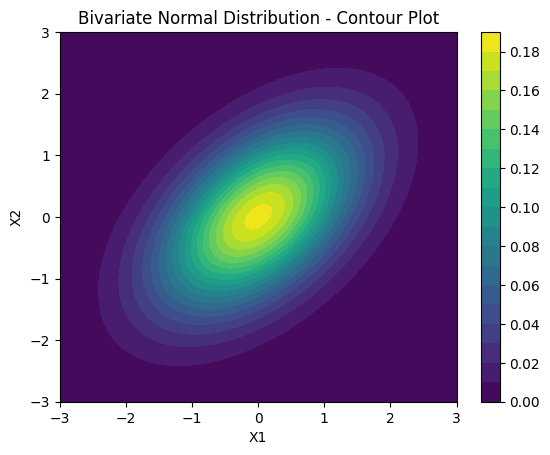

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Bivariate normal distribution parameters
mu = np.array([0, 0])  # Mean vector
sigma = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix

# Grid for plotting
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Multivariate normal distribution
rv = multivariate_normal(mu, sigma)

# Plot contour
plt.contourf(X, Y, rv.pdf(pos), levels=20, cmap="viridis")
plt.title("Bivariate Normal Distribution - Contour Plot")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar()
plt.show()


## Types of Covariance Matrices

The shape of a multivariate normal distribution is determined by its covariance matrix. We commonly encounter three types of covariance matrices:

### 1. Spherical Covariance Matrix:
- All dimensions have the same variance.
- No covariance between dimensions.
- Represents a circular or spherical distribution.

### 2. Diagonal Covariance Matrix:
- Variance differs between dimensions.
- No covariance between dimensions.
- Represents an elliptical distribution aligned with the axes.

### 3. Full Covariance Matrix:
- Both variance and covariance between dimensions are considered.
- Represents an elliptical distribution that can be rotated in any direction.


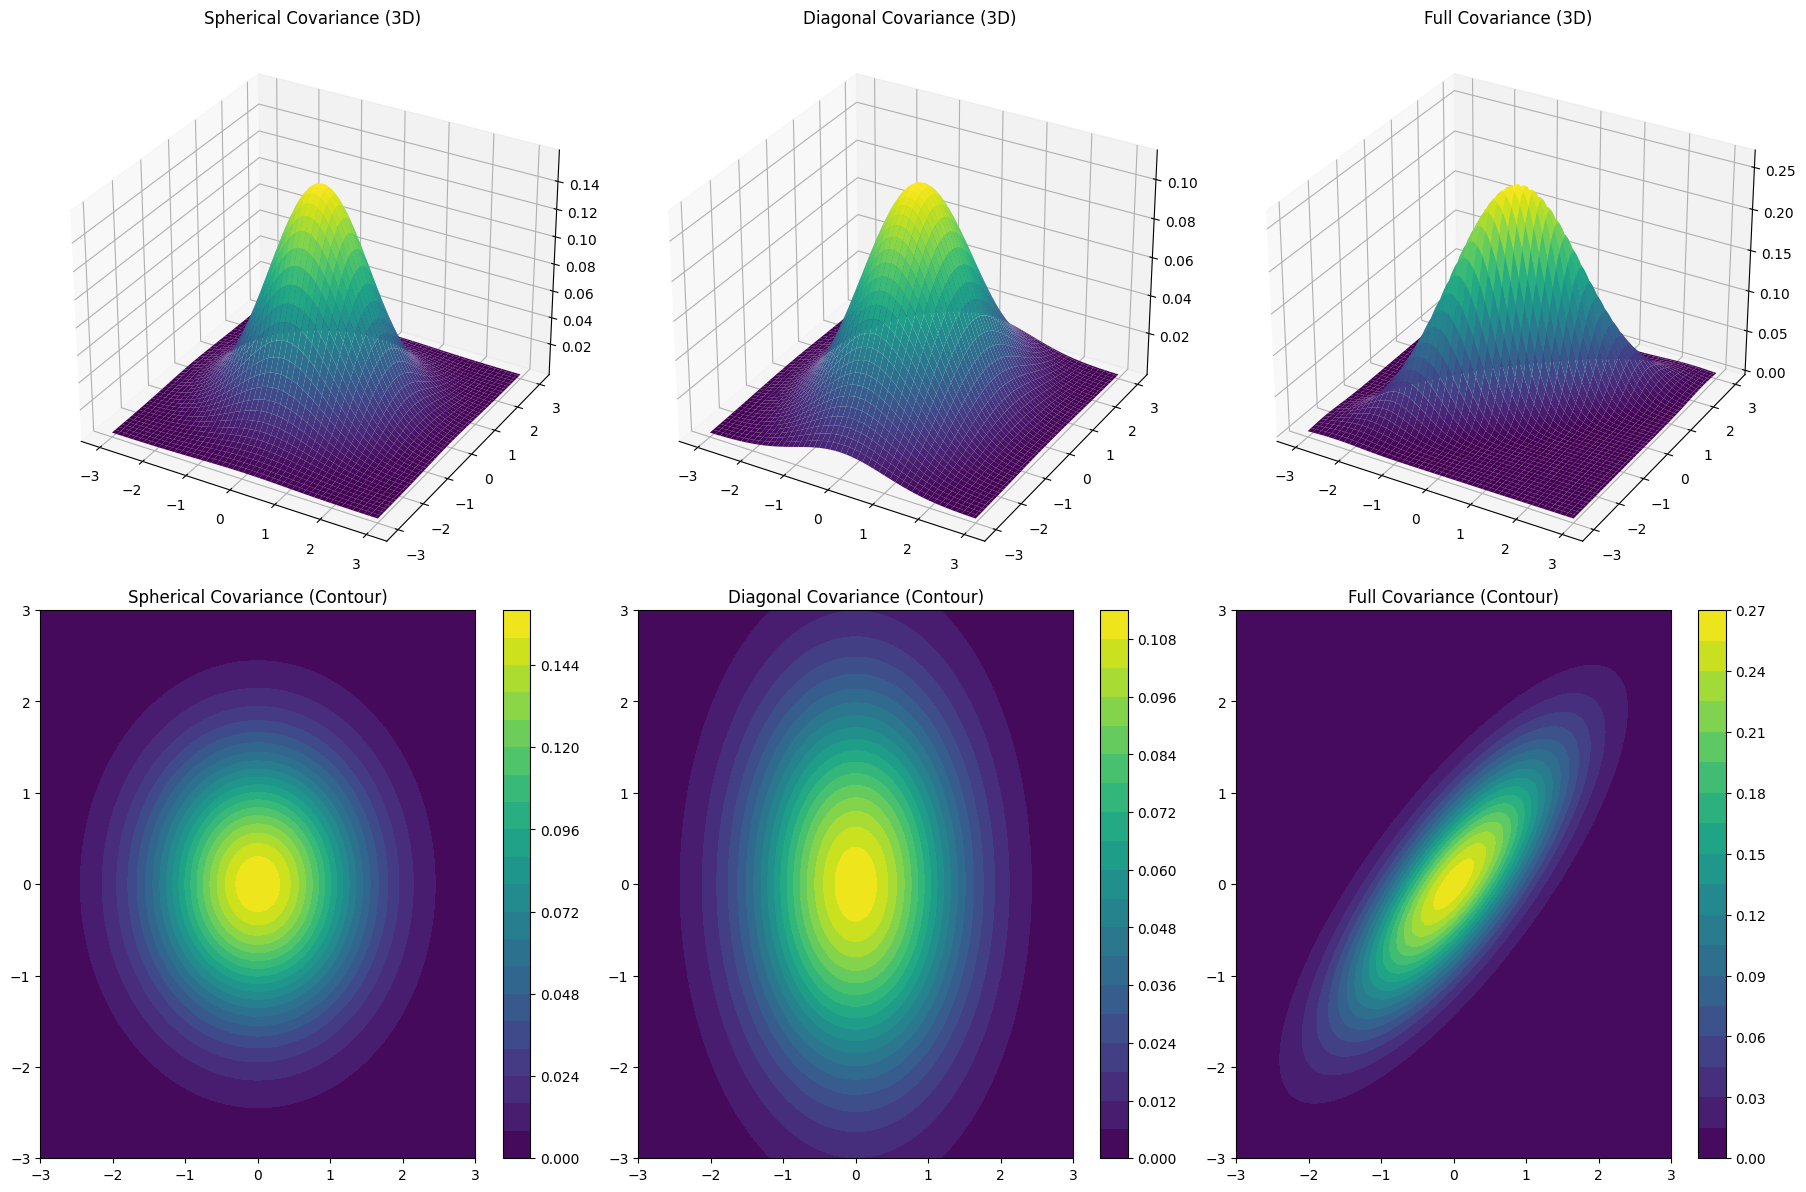

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Helper function for 3D plotting
def plot_3d_surface(rv, ax):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    Z = rv.pdf(pos)
    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor='none')

# Helper function for 2D contour plotting
def plot_contour(rv, ax):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    Z = rv.pdf(pos)
    contour = ax.contourf(X, Y, Z, levels=20, cmap="viridis")
    plt.colorbar(contour, ax=ax)

# Define the mean and covariance matrices
mu = [0, 0]

# Spherical Covariance
cov_spherical = [[1, 0], [0, 1]]
rv_spherical = multivariate_normal(mu, cov_spherical)

# Diagonal Covariance
cov_diagonal = [[1, 0], [0, 2]]
rv_diagonal = multivariate_normal(mu, cov_diagonal)

# Full Covariance
cov_full = [[1, 0.8], [0.8, 1]]
rv_full = multivariate_normal(mu, cov_full)

fig = plt.figure(figsize=(18, 12))

# Spherical covariance plots
ax1 = fig.add_subplot(231, projection='3d')
plot_3d_surface(rv_spherical, ax1)
ax1.set_title("Spherical Covariance (3D)")

ax2 = fig.add_subplot(234)
plot_contour(rv_spherical, ax2)
ax2.set_title("Spherical Covariance (Contour)")

# Diagonal covariance plots
ax3 = fig.add_subplot(232, projection='3d')
plot_3d_surface(rv_diagonal, ax3)
ax3.set_title("Diagonal Covariance (3D)")

ax4 = fig.add_subplot(235)
plot_contour(rv_diagonal, ax4)
ax4.set_title("Diagonal Covariance (Contour)")

# Full covariance plots
ax5 = fig.add_subplot(233, projection='3d')
plot_3d_surface(rv_full, ax5)
ax5.set_title("Full Covariance (3D)")

ax6 = fig.add_subplot(236)
plot_contour(rv_full, ax6)
ax6.set_title("Full Covariance (Contour)")

plt.tight_layout()
plt.show()


## Why Learn the Multivariate Normal Distribution (MVN)?

The MVN is a cornerstone in statistics and machine learning, providing the foundation for modeling real-world data with multiple dimensions. Understanding the MVN is essential because:

1. **Data Modeling**: It helps model relationships between multiple variables.
2. **Dimensionality**: It provides insights into data across multiple dimensions.
3. **Gaussian Assumptions**: Many algorithms assume data follows a Gaussian distribution.
4. **Anomaly Detection**: MVN is used for identifying outliers in high-dimensional data.
5. **Mahalanobis Distance**: A powerful distance metric that accounts for correlations between variables.


## Mahalanobis Distance vs. Euclidean Distance

### 1. Euclidean Distance
Euclidean distance is the standard straight-line distance between two points. In multivariate space, it does not account for the correlations between variables. 

### 2. Mahalanobis Distance
Mahalanobis distance accounts for the covariance between variables, making it a more accurate distance metric in multivariate contexts.

$$
d_M(\mathbf{x}) = \sqrt{(\mathbf{x} - \mu)^\top \Sigma^{-1} (\mathbf{x} - \mu)}
$$


In [3]:
import numpy as np
from scipy.spatial import distance

# Example data points
mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])
point = np.array([1, 1])

# 1. Euclidean Distance
euclidean_dist = np.linalg.norm(point - mean)
print(f"Euclidean Distance: {euclidean_dist}")

# 2. Mahalanobis Distance
inv_cov = np.linalg.inv(cov)
mahalanobis_dist = np.sqrt((point - mean).T @ inv_cov @ (point - mean))
print(f"Mahalanobis Distance: {mahalanobis_dist}")

# Alternatively, using scipy
mahalanobis_dist_scipy = distance.mahalanobis(point, mean, np.linalg.inv(cov))
print(f"Mahalanobis Distance (scipy): {mahalanobis_dist_scipy}")


Euclidean Distance: 1.4142135623730951
Mahalanobis Distance: 1.1547005383792515
Mahalanobis Distance (scipy): 1.1547005383792515


Hypothetical two-dimensional example of Mahalanobis distance with three different methods of defining the multivariate location and scatter of the data (from WikiPedia)
![Hypothetical two-dimensional example of Mahalanobis distance with three different methods of defining the multivariate location and scatter of the data (from WikiPedia)
](https://upload.wikimedia.org/wikipedia/commons/9/9d/Mahalanobis-distance-location-and-scatter-methods.png)

## Interested in Learning More About Distributions?

If you're intrigued by probability distributions and want to explore them in greater depth, check out my comprehensive notebook on Kaggle:

**[🌳 📈  Complete Guide to Distributions A to Z](https://kaggle.com/code/matinmahmoudi/complete-guide-to-distributions-a-to-z/)**

This guide covers a wide range of distributions and practical examples.

Feel free to dive in and explore the world of distributions!

---
## Thank You for Exploring This Notebook!


If you have any questions, suggestions, or just want to discuss any of the topics further, please don't hesitate to reach out or leave a comment. Your feedback is not only welcome but also invaluable!

Happy analyzing, and stay curious!

---